# GEOL 3910: Understanding Global Change through Isotope Data and Python Data Operations
Authors: Amanda Alexander, Tristan Caro, Kevin Rozmiarek

Due for GEOL 5042 November 10, 2020

### Learning Goals
1. introduction to pandas data frames, numpy in python
2. import and use of scipy
3. fitting functions for datasets with least-squares method
4. describe anthropogenic causes of incresed carbon emissions

**Tip:** Before we get started, go ahead and click 'Run' -> 'Run all cells' from the navigation tool bar up top. Later, when you are ready to run any cell you have modified, simply do <code>shift+enter</code> in the cell box or click 'Run' -> 'Run selected cells'

## Table of Contents
1. **[Stable Isotope Fractionation](#StableIsotopeFractionation1)**

    1 [Background](#StableIsotopeFractionation2)
    
    2 [Concept Questions](#StableIsotopeFractionation3)
    

2. **[Data Structures and Visualization](#DataStructures1)**

    1 [Introduction](#DataStructures2)
    
    2 [Example](#DataStructures3)
    
    3 [Practice Questions](#DataStructures4)
    

3. **[Linear Least Squares Regression Method](#LeastSquares1)**

    1 [Background](#LeastSquares2)
    
    2 [Practice Questions](#LeastSquares3)
    
    3 [Example with SciPy](#LeastSquares4)
    

4. **[Summary and big picture example: Stable Isotopes of the Carbon Cycle](#BigPicture1)**

    1 [Summary Questions](#BigPicture2)
    

<a name="StableIsotopeFractionation1"></a>
## 1. Stable Isotope Fractionation 

<a name="StableIsotopeFractionation2"></a>
### 1.1 Background
All elements consist of protons, neutrons, and electrons. Elements are defined by their *atomic number*, the number of protons contained within their nucleus, such as Oxygen, whose atomic number is **8**. Often, elements can exist with the same atomic number, but a different number of neutrons. An atom with the same atomic number, but a differing number of neutrons, is defined as an **isotope**. Often, isotopes are radioactive and cause atomic decay. Carbon 14 $^{14}C$, for example, is Carbon 12 with two extra neutrons, leading it to have an atomic mass of 14. $^{14}C$ is radioactive and decays into Nitrogen 14 via [Beta Decay](https://www.esrl.noaa.gov/gmd/ccgg/isotopes/decay.html#:~:text=C%20decays%20by%20a%20process,rather%20than%20a%20carbon%20atom.). Atoms with differing numbers of neutrons that are *not* radioactive are called stable isotopes. $^{13}C$, for example, is a stable isotope of carbon.

Because stable isotopes of a given element have differing weights, they are often termed "light" or "heavy." This weight difference is often small (just the weight of one or two neutrons), but can be significant enough to cause changes in the reaction characteristics of molecules, especially when a reaction is mediated by biological enzymes. These differing reaction rates often lead to one isotope being preferentially reacted when compared to the other - this is known as **stable isotope fractionation**. Often times, but not always, biological systems "prefer" the light isotope of a given element, due to it having faster reaction kinetics than its heavy counterpart. In shorthand, scientists will often say "life prefers light." The result of this is that one can often search for the source of a compound of interest by looking at its isotopic composition *i.e.* does the isotopic composition of our compound of interest match that of a biological system or that of an abiotic reaction?

### Commonly Studied Stable Isotopes
A few commonly studied stable isotopes in biogeochemical systems are:
- $^2H$ : Deuterium, stable isotope of Hydrogen $^1H$
- $^{13}C$ : Carbon 13, stable isotope of Carbon $^{12}C$
- $^{15}N$ : Nitrogen 15, stable isotope of Nitrogen $^{14}N$
- $^{17}O$ : Oxygen 17, stable isotope of Oxygen $^{16}O$
- $^{18}O$ : Oxygen 18, stable isotope of Oxygen  $^{16}O$

### Delta Notation
Stable isotope fractionation is often written out using "delta" ($\delta$) notation. Delta notation is a ratio of ratios, where the ratios are those of one isotope to another. In other words:

$$
\delta = \frac{R_{sample} - R_{standard}}{R_{standard}}
$$

where $R_{sample}$ is the isotope ratio of the sample and  $R_{standard}$ is the isotope ratio of an international standard. In the case of Carbon, a common international standard is VPDB (Vienna Pee Dee Belemnite).

Delta notation is often expressed in "permil". Similar to percent, delta values can be converted to permil by multiplying by 1000.

$$
\delta \space in \space permil: = \frac{R_{sample} - R_{standard}}{R_{standard}} * 1000
$$

### 1.2 Concept questions
1. Hydrogen isotopes $^1H$ and $^2H$ often fractionate more strongly in biological systems than those of Carbon $^{12}C$ and $^{13}C$. Why do you suspect this is the case?

> Answer: Think about the relative weights of these elements. The stable isotopes of Carbon have atomic masses of 13 and 12, a difference of roughly 8%. Deuterium (2H) is twice as heavy as light hydrogen (1H). Because an extra neutron adds a greater amount of *relative* mass, deuterium often fractionates much more strongly than heavier elements such as Carbon.

2. Consider the made-up element *Bozium* that has two isotopes of heavy and light. What is the delta value of a sample whose istotope ratio (heavy/light) is .25, compared to an international Bozium standard that has an isotope ratio of .1?

$$
\delta = \frac{R_{sample} - R_{standard}}{R_{standard}} \\
\delta = \frac{0.25 - 0.1}{0.1} \\
\delta = 1.5
$$

> Answer: 1.5. 

<hr/>

<a name="DataStructures1"></a>
## 2. Data Structures and Visualization

We will be using python to read, modify, and visualize our data.

<a name="DataStructures2"></a>
### 2.1 Introduction to Pandas Dataframes – First Steps
There are three packages, or libraries, that are important for data analysis in python. These are "numpy", "pandas", and "matplotlib".

You can import these into a python script using the following commands:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd, np, and plt are shorthand that allow us to call functions from these packages without referring to their full names.

<a name="DataStructures3"></a>
### 2.2 Introduction to Pandas Dataframes – Example
For brevity, we will only go through basic Pandas and Matplotlib syntax. For a more in-depth discussion on numpy, pandas, and matplotlib:
- Numpy: https://numpy.org/devdocs/user/quickstart.html
- Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html

#### Pandas
There are two main components of data in the `pandas` universe: series and Data Frames. A series is a list of numbers -- like a column. A Data Frame is multiple series, a collection of columns.

For example, we can define some data using a python dictionary:

In [2]:
data = {
        'customer': [1,2,3,4], # a series
        'bananas': [5,12,2,4], # a series
        'pears': [5,6,7,8] # a series
}

And tell pandas to turn it into a `DataFrame`:

In [3]:
inventory = pd.DataFrame(data)
inventory

,customer,bananas,pears
0,1,5,5
1,2,12,6
2,3,2,7
3,4,4,8


The leftmost column is the index, and the two series we defined above are placed side-by-side. Note that in python, data is indexed starting at `0`: the first element of the list is in the "0th" position.

We can now plot this data using matplotlib. Matplotlib can plot directly from pandas dataframes as follows:

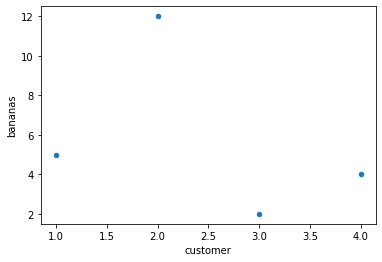

In [4]:
inventory.plot(kind = 'scatter', x = 'customer', y = 'bananas')

<a name="DataStructures4"></a>
### 2.3 Practice Questions 


1. Using a python dictionary, write the temperature forecast for every day next week. HINT: Days of the week should be written as strings in quotes, within a python list e.g. `["Monday", "Tuesday", ...]`

> Answer:
```
weather = {
    "day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "temp (F)": [70, 69, 31, 66, 55, 89, 87]
}
```

2. Plot the forecast as a scatterplot using matplotlib
> See code snippet below

3. Import the data that we will use for the exercise and inspect it. What do the series consist of? How is the data structured? HINT: use the command `co2ppm_Data =  pd.read_csv('data/co2_mlo_surface-flask_1_ccgg_event.txt',delim_whitespace=True)` to import the data.

> The dataframe is 9931 rows by 27 columns. Each row represents an *observation* and each column represents a *variable*. Some data is categorical, meaning that it can fit into discrete bins e.g. year, sample method, etc. Categorical data is defined by *categories*. Some data is continuous, meaning it sits on a numerical scale. Continuous data us numerical e.g. sample latitude, longitude, and elevation.

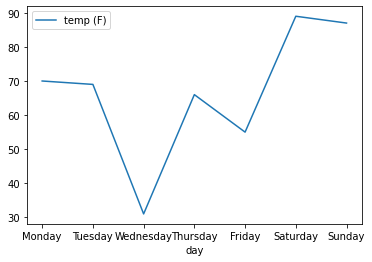

In [5]:
# Question 2: Plotting Weather Data
import pandas as pd
import matplotlib.pyplot as plt
weather = {
    "day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "temp (F)": [70, 69, 31, 66, 55, 89, 87]
}
weather_df = pd.DataFrame(weather)
weather_df

# Plot
weather_df.plot(kind = 'line', x = 'day', y = 'temp (F)')

In [6]:
# Question 3: Reading in real data
co2ppm_Data =  pd.read_csv('data/co2_mlo_surface-flask_1_ccgg_event.txt',delim_whitespace=True)
co2ppm_Data

,sample_site_code,sample_year,sample_month,sample_day,sample_hour,sample_minute,sample_seconds,sample_id,sample_method,parameter_formula,...,analysis_day,analysis_hour,analysis_minute,analysis_seconds,sample_latitude,sample_longitude,sample_altitude,sample_elevation,sample_intake_height,event_number
0,MLO,1969,8,20,17,55,0,33-69,N,co2,...,9,9,2,0,19.5300,-155.5800,3399.0,3397.0,2.0,78808
1,MLO,1969,8,20,17,55,0,34-69,N,co2,...,9,9,12,0,19.5300,-155.5800,3399.0,3397.0,2.0,78809
2,MLO,1969,8,20,18,30,0,31-69,N,co2,...,9,8,58,0,19.5300,-155.5800,3399.0,3397.0,2.0,78810
3,MLO,1969,8,20,18,30,0,32-69,N,co2,...,9,9,0,0,19.5300,-155.5800,3399.0,3397.0,2.0,78811
4,MLO,1969,8,27,19,15,0,35-69,N,co2,...,9,8,42,0,19.5300,-155.5800,3399.0,3397.0,2.0,78812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,MLO,2019,12,17,20,10,0,4584-99,S,co2,...,27,9,41,13,19.5362,-155.5763,3437.0,3397.0,40.0,469143
9927,MLO,2019,12,26,19,55,0,1763-99,S,co2,...,20,13,38,6,19.5362,-155.5763,3437.0,3397.0,40.0,470492
9928,MLO,2019,12,26,19,55,0,5296-99,S,co2,...,20,13,23,48,19.5362,-155.5763,3437.0,3397.0,40.0,470491
9929,MLO,2019,12,26,20,7,0,516-99,P,co2,...,20,13,52,25,19.5362,-155.5763,3402.0,3397.0,5.0,470489


<hr/>

<a name="LeastSquares1"></a>
## 3. Least Squares

<a name="LeastSquares2"></a>
### 3.1 Background

Consider the data that you read in and plotted in the previous section. You could probably imagine drawing a line by eye through the majority of the points. But it is more accurate to calculate the line of best fit using the least squares method. The least squares regression method is an important application for fitting data. In this exercise, we will focus on the linear least squares. 

Recall the equation of a line:
$$y = mx+b$$
where $y$ is the dependent variable, $m$ is the slope, $x$ is the independent variable and $b$ is the y-intercept.

Now we want to compute the line that fits our data via the following steps:

1. For each (x,y) point calculate x2 and xy

2. Sum all x, y, x2 and xy ($\sum(x)$, $\sum(y)$, $\sum(xy)$ and $\sum(x^2)$)

3. Calculate Slope (m) as the following:

$$m = \frac{N\sum{(xy)} − \sum{x}\sum{y}}{N \sum{(x^2)} − (\sum{x^{2}})}$$

(Note: **N** is the number of points.)

4. Calculate the y-intercept (b):

$$b = \frac{\sum{y} − m\sum{x}}{N}$$

5. Assemble the equation of a line
$$ y = mx + b $$


An important caution with this method is to watch out for outliers. A way to visualize this method is to look at the scatter plot of your data, and then imagine a spring connects each data point to the line of best fit, so any outliers or strange values will pull the line towards it. A spring naturally wants to be less stretched and so it turns out that minimizing the overall energy in the springs is actually equivalent to fitting a regression line using the method of least squares.

<img src="lsm_img.png" alt="A visualization of the errors (residuals) with LSM" width="500" height="600">

This is because the least squares method works by making the total of the square of the errors as small as possible. When we square each of the errors and then sum them all up, that total is as small as possible -- in a perfect world, the sum would be zero. Neat, huh?

Note: these errors are also sometimes called *residuals*. To infer how well a line fits data: the better the line fit, the smaller the residuals. 



<a name="LeastSquares3"></a>
### 3.2 Practice with least squares

In [7]:
# Making up some data
np.random.seed(12345678) #THIS CAN BE CHANGED TO THE PREVIOUS DATA STRUCTURE EXAMPLES
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

1. Using the data we just made up above, follow the five steps of the least squares method to assemble the equation of a line. Enter code in the boxes provided. 

In [8]:
#1. for each point compute x^2 and xy:
x2  = x**2
xy  = x*y 

In [9]:
#2. sum all x, y, x2 and xy -- let's use the numpy sum() function
sum_X  = np.sum(x)
sum_Y  = np.sum(y)
sum_X2 = np.sum(x2)
sum_XY = np.sum(xy)

In [10]:
#3. calculate slope
# recall N is the number of points, to get this use the len() function
N = len(x)

# it might be easiest to break this into a few parts
# first, let's work the numerator:
numerator   = N * sum_XY - (sum_X*sum_Y)

# next, the denomenator:
denomenator = N * sum_X2 - sum_X**2

# finally, the fraction as a whole:
slope = numerator/denomenator

In [11]:
# 4. calculate y-intercept
y_int = (sum_Y*slope - sum_X) / N

In [12]:
# 5. assemble the equation in the form y = mx + b
line_of_fit = slope*x + y_int

2. Plot the made up data as a scatter plot and add the line of best fit as a RED line. 

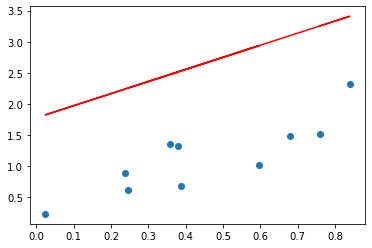

In [13]:
#create basic scatterplot
plt.scatter(x, y)

#then we add the line of fit, colored red
plt.plot(x,line_of_fit, color='r')

<a name="LeastSquares4"></a>
### 3.3 Scipy example

So now you've built your own least squares method and used it to fit to your data and you've plotted it and that was awesome but implimenting it was kinda a pain wasn't it? Now that you've gone through this process, you can appreciate the value of programs that do that heavy lifting for you.

[Scipy](https://www.scipy.org/) is a self-described "ecosystem" of packages and libraries that have a great number of the tools that you will use as a scientist/geologist. In the software world, we would call this a **stack** or series of interdependent programs that build on themselves to perform tasks. Scipy is open source meaning that it is maintained by passionate community memebers invested in it's success. We are going to utilze Scipy to do what we did above in a few lines.

In [14]:
#Import the library
import matplotlib.pyplot as plt
import numpy as np #Can be removed because it will be used previously
from scipy import stats

In [15]:
#Making up some data
np.random.seed(12345678) #THIS CAN BE CHANGED TO THE PREVIOUS DATA STRUCTURE EXAMPLES
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

In [16]:
#Doing all that work in ONE line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 1.944864    intercept: 0.268578


In [17]:
print("R-squared: %f" % r_value**2)

R-squared: 0.735498


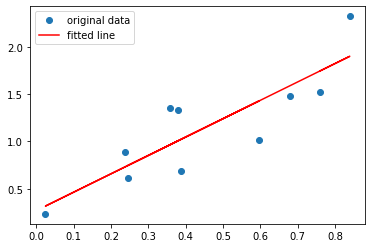

In [18]:
#Using our new plotting skills, lets plot our original data vs our fit
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Pretty easy huh?

Let's look at a big picture example...

<hr/>

<a name="BigPicture1"></a>
## 4. Summary and big picture example: Stable Isotopes of the Carbon Cycle


<a name="BigPicture2"></a>
### 4.1 Summary questions

So a lot of you have probably heard of this global warming thing by now. We release carbon dioxide and other **greenhouse gases** into the atmosphere and cause solar radiation reflected off the surface of the Earth to remain trapped as heat. Lets use a combination of all of our sweat new tools to infer something about what is going on in this **carbon cycle** and where it is going.

We are going to pull from the NOAA Global Monitoring Divison's flask network. This network represents dozens of different measurements of atmospheric gases over dozens of locations around the world. For now, we are going to looks at the carbon dioxide mole fraction of air (part per million to be exact) at Mauna Loa, an active volcano in Hawai'i. You'll see, quite depressingly, that it continues to go upwards. The periodic component of this plot is the seasonal cycle and the total plant biomass' ability to fix carbon out of the atmosphere. 

Note: you must run the following box twice for jupyter notebook to render the plot correctly :)

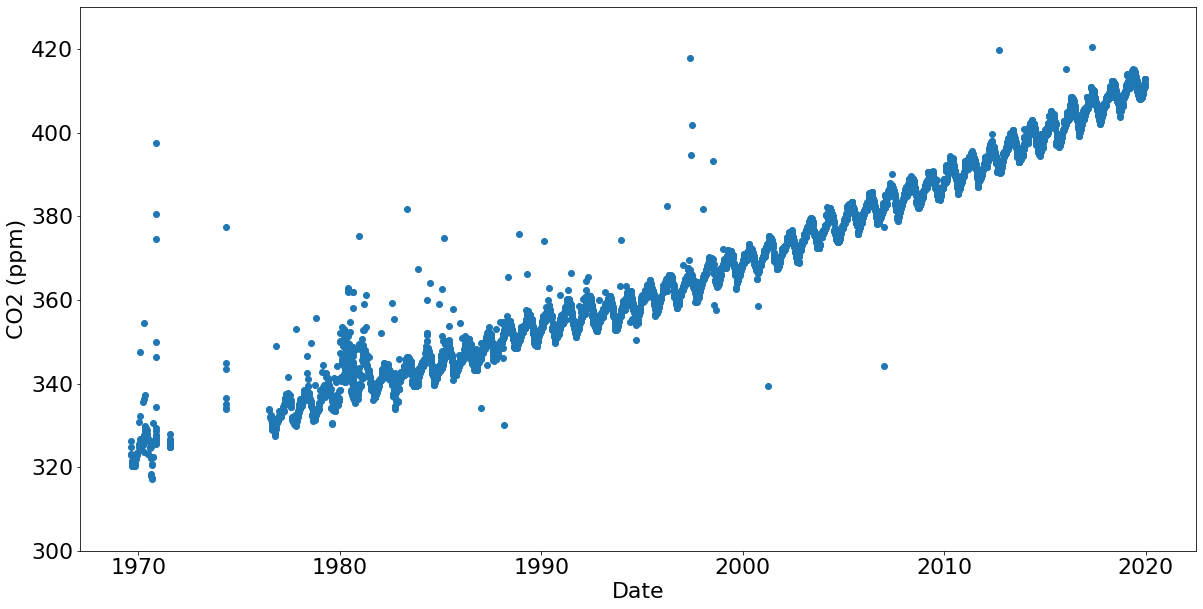

In [22]:
#Using pandas, we are going to read in the text file delimited by whitespace
co2ppm_Data =  pd.read_csv('data/co2_mlo_surface-flask_1_ccgg_event.txt',delim_whitespace=True)

#Lets move the data into a form that can be plotted
co2ppm_Dates_col = [co2ppm_Data['sample_year'],co2ppm_Data['sample_month'],co2ppm_Data['sample_day']]
co2ppm_Dates = pd.concat(co2ppm_Dates_col, axis=1)
co2ppm_Dates.columns = ['year', 'month','day']
co2ppm_DateTime = pd.to_datetime(co2ppm_Dates)

#The CO2 value
co2ppm_co2 = co2ppm_Data['analysis_value']

#Plot!
plt.plot(co2ppm_DateTime, co2ppm_co2, 'o')
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size':22})
plt.ylim(300, 430)
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.show()

Drawing from your newfound knowledge of stable isotopes, let's talk about the stable isotopes of carbon. In general, faster reactions fractionate more than slower ones. That means that quick reactions with carbon in their products will drastically prefer carbon 12 to carbon 13. Combustion, or a process of burning fuel, is one of these quick processes.

**Question:** How would you expect the isotopic value of the atmosphere to change if we (as in us pesky humans) produced more combustion CO2 than other sources?

**Answer:** The isotope value would most likely become more depleted in 13C. The isotope value would get more negative.

Below is the isotope record at Mauna Loa. This just so happens to produced at CU's Insitute of Arctic and Alpine Research.

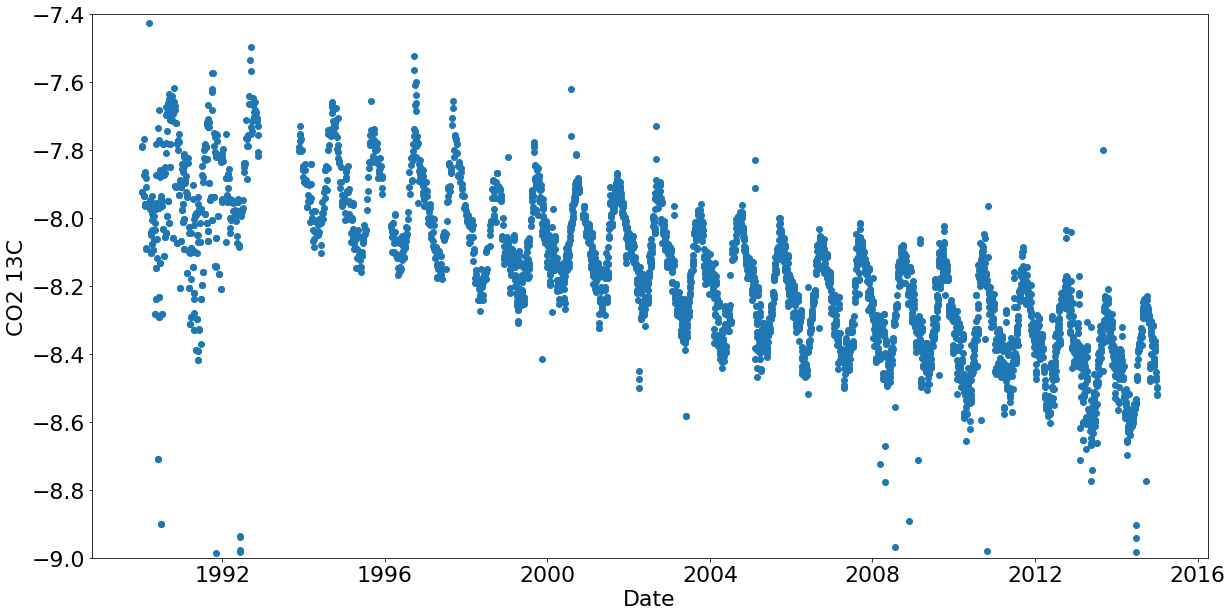

In [20]:
#Same as before, just with a different data file
co2c13_Data =  pd.read_csv('data/co2c13_mlo_surface-flask_1_sil_event.txt',delim_whitespace=True)

co2c13_Dates_col = [co2c13_Data['sample_year'],co2c13_Data['sample_month'],co2c13_Data['sample_day']]
co2c13_Dates = pd.concat(co2c13_Dates_col, axis=1)
co2c13_Dates.columns = ['year', 'month','day']
co2c13_DateTime = pd.to_datetime(co2c13_Dates)

co2c13_co2 = co2c13_Data['analysis_value']


plt.plot(co2c13_DateTime, co2c13_co2, 'o')
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size':22})
plt.ylim(-9, -7.4)
plt.xlabel('Date')
plt.ylabel('CO2 13C')
plt.show()

**Question:** Speculate about why this graph trend downward based on your knowledge of isotopes and the sources of carbon. What does carbon isotopes having a seasonal cycle imply about plants?

**Answer:** It implies that there is a fractionation associated with photosynthesis because isotopes changes with the seasons (and by extension, plant biomass).

Now lets use our awesome skills of linear regression to make a prediction of where the isotope signal may be going.

In [21]:
# Use scipy to fit a linear regression of the isotope data and plot it against the data (revisit section 3.2.2 for help).

#This line should help
import matplotlib.dates as mdates
x = mdates.date2num(co2c13_DateTime)

# You can use this to go back for plotting -> your_var_name = mdates.num2date(points)

#Use your new regression to predict what the value will be in 2020. What about 2024?

This isotope data set isn't up to date for a reason! Let's find the data ourselves. Go to the data visualizer for [NOAA GMD](https://www.esrl.noaa.gov/gmd/dv/iadv/), find Mauna Loa, hit "Carbon Cycle Gases" and then "Time Series". Select the Carbon-13/Carbon-12 parameter and hit submit.

**Question:** How was your prediction for 2020? Speculate on how you would fit to include the seasonal pattern to the dataset?

**Answer:** It looks pretty accurate! I would fit a trig function to the plot. Some sort of fit to a function like A + Bx + Csin(x)

**Question:** What does this data set imply about human, *anthropogenic*, emissions? Understand that interpreting the isotope record of the atmosphere is an ongoing reasearch topic so don't be afraid of a wrong answer!

**Answer:** The short answer is that it seems likely that the atmosphere is becoming more and more composed of anthropogenic sources of carbon.